In [ ]:
import numpy as np 
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


READ AND RESIZE THE IMAGES IN DATASET








In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(224,224)
batch_size=32

train_ds=image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,

)

val_ds=image_dataset_from_directory(
     "/content/gdrive/MyDrive/Dataset",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1152 files belonging to 2 classes.
Using 922 files for training.
Found 1152 files belonging to 2 classes.
Using 230 files for validation.


In [ ]:
test_ds=image_dataset_from_directory(
     "/content/gdrive/MyDrive/Dataset",
     labels="inferred",
     label_mode="int",
     seed=1337,
     image_size=image_size,
     batch_size=batch_size,
)

Found 1152 files belonging to 2 classes.


Visualing the Data

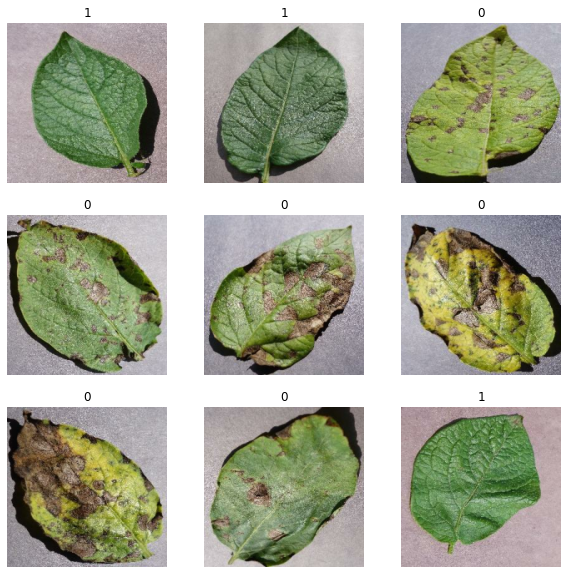

In [ ]:
#visualising the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

IMAGE SEGMENTATION TECHNIQUE USING K-MEANS CLUSTERING\


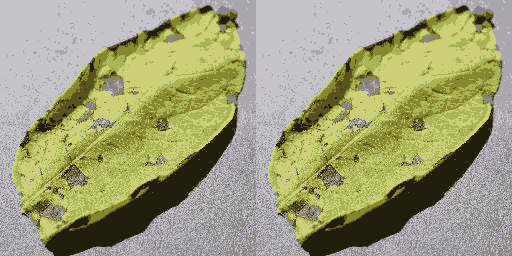

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1= cv2.imread('/content/gdrive/MyDrive/Dataset/Potatoeffected/1.JPG')
img2= img1.reshape((-1,3))
img3=img1.reshape((-1,3))
img2 = np.float32(img2)
img3 = np.float32(img3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#clusters


attempts=10

ret,label,center=cv2.kmeans(img2,4,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
ret,label,center=cv2.kmeans(img3,8,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img1.shape))
res3 = res.reshape((img1.shape))


from google.colab.patches import cv2_imshow
img_arr = np.hstack((res2, res3))

cv2_imshow(img_arr)

cv2.waitKey(0)

cv2.destroyAllWindows()

REDUCE NOISE:

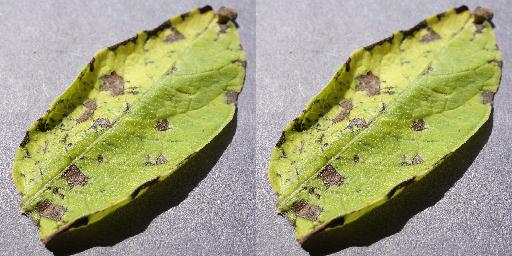

In [ ]:
#Here we removed some noise from the images 

image=cv2.imread('/content/gdrive/MyDrive/Dataset/Potatoeffected/1.JPG')
kernel=np.ones((1,1),np.float32)/1

filt_2D=cv2.filter2D(image,-1,kernel)
cv2.imshow=("original",image)
cv2.imshow=("2D custom filter",filt_2D)



img_arr = np.hstack((image, filt_2D))
cv2_imshow(img_arr)


cv2.waitKey(0)


cv2.destroyAllWindows()


IMAGE CLASSIFIER TECHNIQUES:


IMAGE CLASSIFIER USING MOBILENET:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

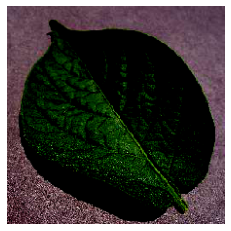

In [ ]:
img_array=image.img_to_array(img)
img1=tf.keras.applications.mobilenet.preprocess_input(img_array)

plt.imshow(img1)
plt.axis('off')

USING RESNET50:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

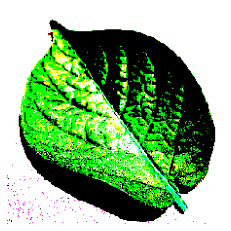

In [ ]:
img_array=image.img_to_array(img)
img=tf.keras.applications.resnet50.preprocess_input(img_array)

plt.imshow(img)
plt.axis('off')